# Module 3 Assignment
#### ATMS 523
#### Erin Welch

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

1. Adapt the code from class that reads GHCN Daily Data from Amazon Web Services and write a function that will download the station you want (called with a GHCN station ID), and calculate (1) the all time record high and low and (2) the normal (mean) high and low temperature *FOR EACH CALENDAR DAY* for the 1991-2020 period for the desired station.  The function should return a pandas data frame with the columns ['record_min_temp', average_min_temp', 'average_max_temp', record_max_temp'] FOR EACH DAY.  Write a code that can call this function and successfully demonstrate that it works.

In [2]:
# read in GHCN daily data 'ghcnd-stations.txt' 
stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)

# assign columns
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']

# print
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [3]:
# identify all stations containing the name 'HONOLULU'
honolulu_stations = stn_ids[stn_ids['NAME'].str.contains('HONOLULU', case=False, regex=False)]

# list all honolulu-related stations
honolulu_stations

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
65721,US1HIHN0009,21.3361,-157.8325,126.5,HI,HONOLULU 2.2 NW,NaN,NaN
65722,US1HIHN0010,21.2850,-157.7816,112.5,HI,HONOLULU 2.7 SSE,NaN,NaN
65724,US1HIHN0013,21.3372,-157.8614,105.8,HI,HONOLULU 3.9 WNW,NaN,NaN
65727,US1HIHN0017,21.2863,-157.7826,46.0,HI,HONOLULU 2.6 SSE,NaN,NaN
65731,US1HIHN0023,21.3004,-157.8293,11.9,HI,HONOLULU 2.0 SW,NaN,NaN
65734,US1HIHN0031,21.2875,-157.6941,14.9,HI,HONOLULU 7.4 ESE,NaN,NaN
65736,US1HIHN0035,21.3115,-157.8001,106.4,HI,HONOLULU 0.5 SSE,NaN,NaN
65737,US1HIHN0037,21.2866,-157.7544,13.7,HI,HONOLULU 3.8 ESE,NaN,NaN
124063,USC00511925,21.3286,-157.9297,0.9,HI,HONOLULU FIRE STN 703.1,NaN,NaN
127765,USW00022521,21.3239,-157.9394,1.8,HI,HONOLULU INTL AP,NaN,91182.0


In [4]:
# select one specific station for analysis - I will use Honolulu International Airport HNL 
station_id = 'USW00022521'

In [5]:
# read the daily temperature data from this location
data = pd.read_parquet(
    f"s3://noaa-ghcn-pds/parquet/by_station/STATION={station_id}/", # directory for station
     storage_options={"anon": True}  # anonymous access
)

data

,ID,DATE,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
0,USW00022521,19650101,80,None,None,X,None,ACMH
1,USW00022521,19650102,90,None,None,X,None,ACMH
2,USW00022521,19650103,90,None,None,X,None,ACMH
3,USW00022521,19650104,40,None,None,X,None,ACMH
4,USW00022521,19650105,100,None,None,X,None,ACMH
...,...,...,...,...,...,...,...,...
385387,USW00022521,19990404,1,None,None,X,None,WV20
385388,USW00022521,19990712,1,None,None,X,None,WV20
385389,USW00022521,20000201,1,None,None,X,None,WV20
385390,USW00022521,20010226,1,None,None,X,None,WV20


In [6]:
# convert 'DATE' column into proper datetime object
data['DATE'] = pd.to_datetime(data['DATE'].astype(str), format='%Y%m%d')

# set date as the index
data = data.set_index('DATE').sort_index()

# print newly formatted dataframe
data

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1939-06-01,USW00022521,262,H,None,S,None,TAVG
1939-06-02,USW00022521,254,H,None,S,None,TAVG
1939-06-03,USW00022521,256,H,None,S,None,TAVG
1939-06-04,USW00022521,261,H,None,S,None,TAVG
1939-06-05,USW00022521,252,H,None,S,None,TAVG
...,...,...,...,...,...,...,...
2025-02-05,USW00022521,267,None,None,D,2400,TMAX
2025-02-06,USW00022521,261,None,None,D,2400,TMAX
2025-02-06,USW00022521,178,None,None,D,2400,TMIN


In [7]:
# create separate dataframes for different elements of interest (tmax and tmin)
df_tmax = data[data['ELEMENT'] == 'TMAX'].copy()
df_tmin = data[data['ELEMENT'] == 'TMIN'].copy()

In [8]:
df_tmax

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1940-05-14,USW00022521,308,None,None,S,None,TMAX
1940-05-16,USW00022521,308,None,None,S,None,TMAX
1940-05-18,USW00022521,296,None,None,S,None,TMAX
1940-05-19,USW00022521,296,None,None,S,None,TMAX
1940-05-20,USW00022521,291,None,None,S,None,TMAX
...,...,...,...,...,...,...,...
2025-02-02,USW00022521,283,None,None,W,2400,TMAX
2025-02-03,USW00022521,278,None,None,W,2400,TMAX
2025-02-04,USW00022521,278,None,None,W,2400,TMAX


In [9]:
df_tmin

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1940-05-16,USW00022521,208,None,None,S,None,TMIN
1940-05-17,USW00022521,224,None,None,S,None,TMIN
1940-05-18,USW00022521,219,None,None,S,None,TMIN
1940-05-19,USW00022521,224,None,None,S,None,TMIN
1940-05-20,USW00022521,219,None,None,S,None,TMIN
...,...,...,...,...,...,...,...
2025-02-02,USW00022521,172,None,None,W,2400,TMIN
2025-02-03,USW00022521,183,None,None,W,2400,TMIN
2025-02-04,USW00022521,189,None,None,W,2400,TMIN


In [ ]:
# define a function that calculates the following for each calendar day (1991–2020):
#     - record_min_temp : lowest TMIN observed
#     - average_min_temp : 30-year mean of TMIN
#     - average_max_temp : 30-year mean of TMAX
#     - record_max_temp : highest TMAX observed

# AND returns a DataFrame indexed by 'MM-DD' with exactly these 4 columns
# Temperatures are in °C (GHCN is tenths of °C so divide by 10 to get °C)
    
def temperature_stats(df_tmax: pd.DataFrame, df_tmin: pd.DataFrame) -> pd.DataFrame:

    # set temporal period
    # compute long-term averages and records over this standard 30-year period
    tmax = df_tmax[(df_tmax.index.year >= 1991) & (df_tmax.index.year <= 2020)].copy()
    tmin = df_tmin[(df_tmin.index.year >= 1991) & (df_tmin.index.year <= 2020)].copy()

    # create a 'DAY' column representing the calendar day
    # extracts month and day in MM-DD format
    tmax.loc[:, 'DAY'] = tmax.index.strftime('%m-%d')
    tmin.loc[:, 'DAY'] = tmin.index.strftime('%m-%d')

    # build list of all calendar days present
    calendar_days = sorted(set(tmax['DAY'].unique()).union(set(tmin['DAY'].unique())))

    # create empty DataFrame with 'DAY' as the index
    temp_stats = pd.DataFrame(index=calendar_days)

    # compute daily statistics for each calendar day
    # divide by 10 to convert to standard Celsius
    # groupby DAY to aggregate all same-calendar-day values across years
    temp_stats['record_min_temp']  = (tmin.groupby('DAY')['DATA_VALUE'].min() / 10)
    temp_stats['average_min_temp'] = (tmin.groupby('DAY')['DATA_VALUE'].mean() / 10)
    temp_stats['average_max_temp'] = (tmax.groupby('DAY')['DATA_VALUE'].mean() / 10)
    temp_stats['record_max_temp']  = (tmax.groupby('DAY')['DATA_VALUE'].max() / 10)

    # order/clean the dataframe to match the assignment
    temp_stats = temp_stats[['record_min_temp', 'average_min_temp', 'average_max_temp', 'record_max_temp']]

    # return the finished DataFrame
    return temp_stats

In [11]:
# apply function to daily temp datatframes
temp_stats = temperature_stats(df_tmax, df_tmin)
temp_stats

,record_min_temp,average_min_temp,average_max_temp,record_max_temp
01-01,15.6,19.183333,26.813333,28.9
01-02,15.6,19.080000,26.663333,29.4
01-03,15.0,19.483333,26.860000,28.9
01-04,14.4,19.586667,27.210000,29.4
01-05,13.9,19.126667,26.763333,28.9
...,...,...,...,...
12-27,15.6,20.053333,27.316667,30.6
12-28,13.3,20.023333,27.290000,29.4
12-29,14.4,19.973333,27.396667,29.4
12-30,16.7,20.320000,27.113333,29.4


2. Develop a plot (using matplotlib) that displays for the city of choice a plot showing the record, average, and actual high and low temperatures for that year and city for each day over the calendar year.  Note: You do not need to make the chart interactive, you can just plot the data from a your city and for the year of your choice.
     
     You are permitted to use the "weather" example from the `bokeh` gallery as inspiration.  An example for what the plot could look like is here: [Weather](https://demo.bokeh.org/weather), and the GitHub repository for the dashboard is [here](https://github.com/bokeh/bokeh/tree/branch-3.9/examples/server/app/weather). Note that you do not have to use bokeh for this assignment, you can use matplotlib!


In [12]:
# define function to plot the station’s temperature records and averages with the actual daily highs and lows from a given year

def honolulu_plot(temp_stats: pd.DataFrame, df_tmax: pd.DataFrame, df_tmin: pd.DataFrame, year: int, city: str):

    # subset data for a given year
    yr_max = df_tmax[df_tmax.index.year == year].copy()
    yr_min = df_tmin[df_tmin.index.year == year].copy()

    # create 'DAY' column for grouping
    yr_max.loc[:, 'DAY'] = yr_max.index.strftime('%m-%d')
    yr_min.loc[:, 'DAY'] = yr_min.index.strftime('%m-%d')

    # compute daily means for that year
    daily_max = yr_max.groupby('DAY')['DATA_VALUE'].mean() / 10
    daily_min = yr_min.groupby('DAY')['DATA_VALUE'].mean() / 10

    # convert 'MM-DD' strings to datetime objects
    calendar_days = pd.to_datetime('2020-' + temp_stats.index, format='%Y-%m-%d', errors='coerce')
    max_days = pd.to_datetime('2020-' + daily_max.index, format='%Y-%m-%d', errors='coerce')
    min_days = pd.to_datetime('2020-' + daily_min.index, format='%Y-%m-%d', errors='coerce')

    # create Matplotlib figure
    fig, ax = plt.subplots(figsize=(15, 6))

    # plot climatological records and averages
    ax.plot(calendar_days, temp_stats['record_max_temp'], label='Record High', color='red')
    ax.plot(calendar_days, temp_stats['average_max_temp'], label='Average High', color='lightcoral')
    ax.plot(calendar_days, temp_stats['record_min_temp'], label='Record Low', color='blue')
    ax.plot(calendar_days, temp_stats['average_min_temp'], label='Average Low', color='lightgreen')

    # plot actual year’s temperatures
    ax.plot(max_days, daily_max.values, '--', label=f'{year} High', color='maroon')
    ax.plot(min_days, daily_min.values, '--', label=f'{year} Low', color='indigo')

    # format x-axis by months
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim([pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31')])

    # titles and formatting
    ax.set_title(f"{city} Temperatures in {year}", fontsize=16, fontweight='bold')
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Temperature (°C)", fontsize=12)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(alpha=0.3) 

    # show
    plt.tight_layout()
    plt.show()

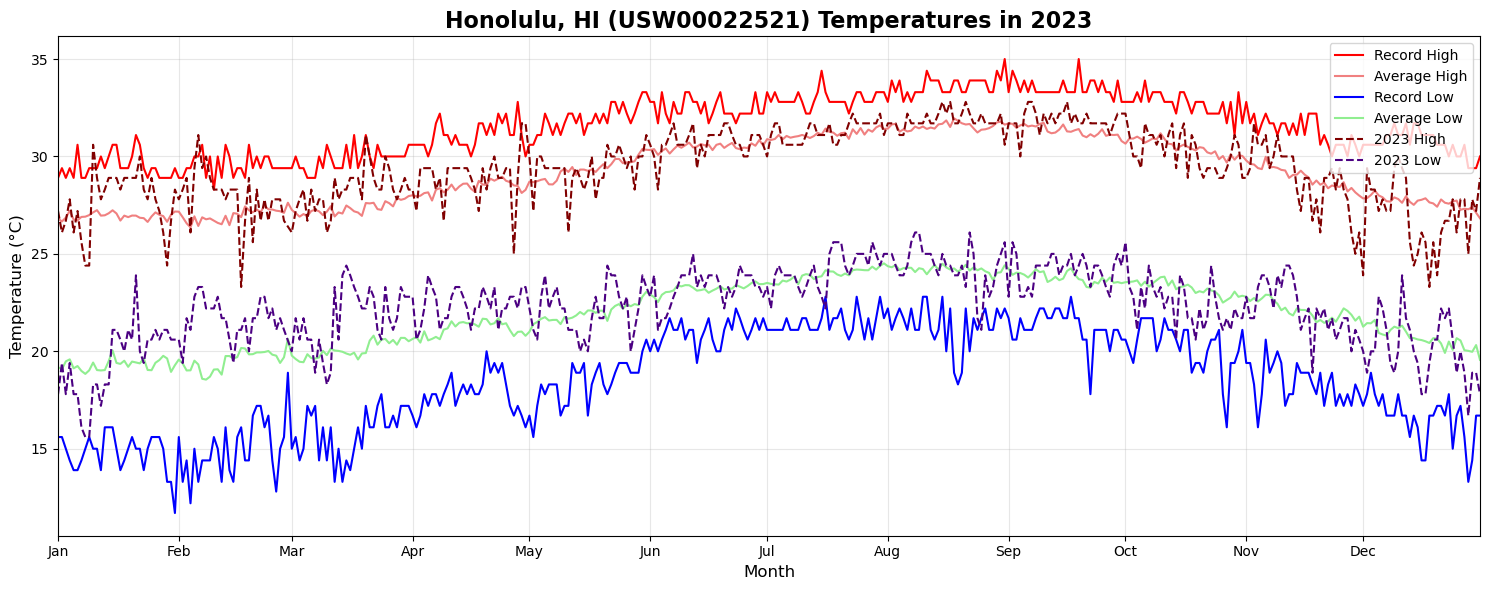

In [13]:
# generate plot for Honolulu, HI for 2023
honolulu_plot(temp_stats, df_tmax, df_tmin, year=2023, city="Honolulu, HI (USW00022521)")

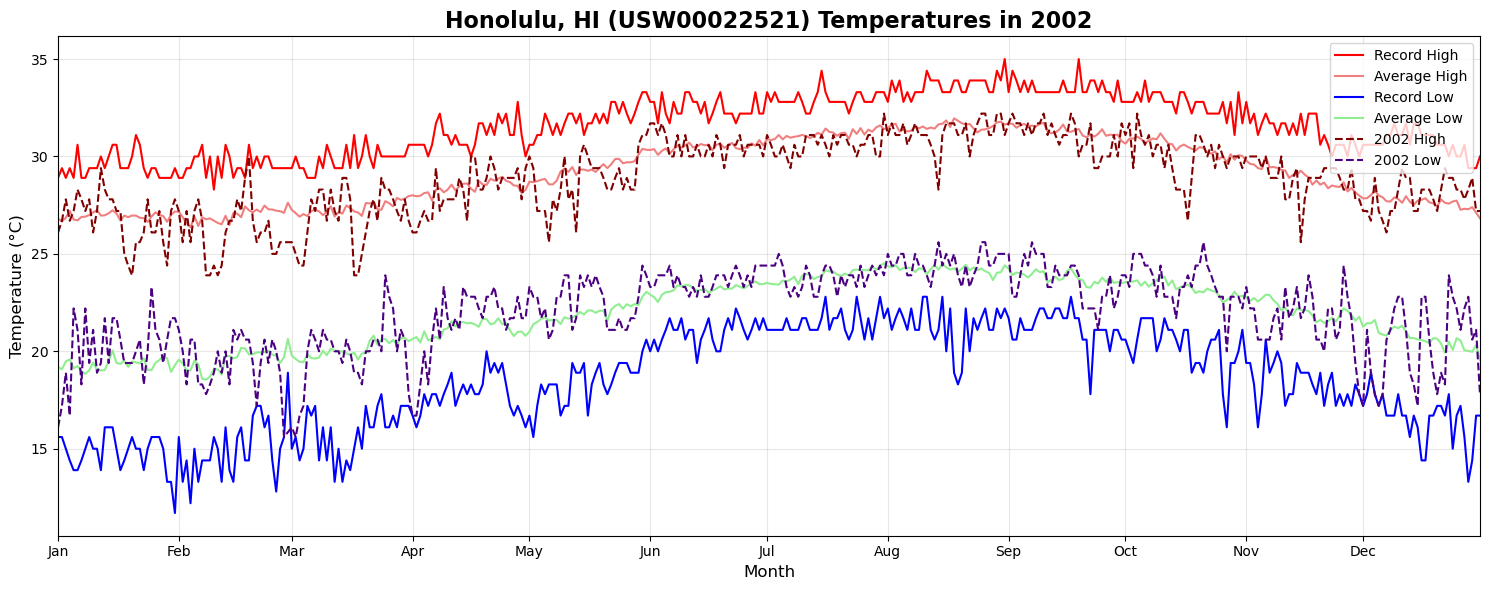

In [14]:
# generate plot for Honolulu, HI for 2002
honolulu_plot(temp_stats, df_tmax, df_tmin, year=2002, city="Honolulu, HI (USW00022521)")